In [1]:
%run ../scripts/notebook_settings.py
import sgkit as sg
import xarray as xr
import glob

from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [2]:
vasili_stats = "~/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/plots/SupTable_Sample_Stats_wGT_QC.tsv"
metadata_path = "/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/"

vasili_table = pd.read_csv(vasili_stats, sep="\t")
sub_vasili = vasili_table.loc[(vasili_table.finalQC != "fail")
                              & (vasili_table.cov_chrA >= 20)
                              & (vasili_table.remove_as_relative != True)
                              & (vasili_table.remove_manual != True)
                              & (~vasili_table.ID.str.startswith("SAMEA11633"))]

In [3]:
known_subspecies = sub_vasili.loc[sub_vasili.subspecies != "ssp"].subspecies.unique()
sub_vasili.loc[sub_vasili.subspecies.isin(known_subspecies)].species.unique()

array(['seniculus', 'campbelli', 'mitis', 'wolfi', 'angolensis',
       'guereza', 'beringei', 'gorilla', 'griseus', 'fascicularis',
       'nemestrina', 'troglodytes', 'cynocephalus', 'ursinus', 'calvus',
       'deckenii', 'melalophos', 'boliviensis', 'apella', 'phayrei'],
      dtype=object)

In [4]:
sub_vasili.loc[sub_vasili.species == "calvus"]

,ID,ID_PGDP,group,family,genus,species,subspecies,species_full,species_short,species_genotyping,...,reason,finalQC,Kuderna_AB_QC,Kuderna_COV_QC,relatives,remove_as_relative,generation,founder,remove_manual,pedigree_source
2696,PD_0024,PD_0024,PLA,Pitheciidae,Cacajao,calvus,calvus,Cacajao_calvus_calvus,C.calvus_calvus,Cacajao_calvus_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2697,PD_0023,PD_0023,PLA,Pitheciidae,Cacajao,calvus,novaesi,Cacajao_calvus_novaesi,C.calvus_novaesi,Cacajao_calvus_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2698,PD_0132,PD_0132,PLA,Pitheciidae,Cacajao,calvus,novaesi,Cacajao_calvus_novaesi,C.calvus_novaesi,Cacajao_calvus_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2699,PD_0130,PD_0130,PLA,Pitheciidae,Cacajao,calvus,rubicundus,Cacajao_calvus_rubicundus,C.calvus_rubicundus,Cacajao_calvus_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2700,PD_0435,PD_0435,PLA,Pitheciidae,Cacajao,calvus,rubicundus,Cacajao_calvus_rubicundus,C.calvus_rubicundus,Cacajao_calvus_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2701,PD_0436,PD_0436,PLA,Pitheciidae,Cacajao,calvus,rubicundus,Cacajao_calvus_rubicundus,C.calvus_rubicundus,Cacajao_calvus_ssp,...,NaN,warn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2702,PD_0437,PD_0437,PLA,Pitheciidae,Cacajao,calvus,rubicundus,Cacajao_calvus_rubicundus,C.calvus_rubicundus,Cacajao_calvus_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2703,PD_0020,PD_0020,PLA,Pitheciidae,Cacajao,calvus,ssp,Cacajao_calvus_ssp,C.calvus_ssp,Cacajao_calvus_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2704,PD_0021,PD_0021,PLA,Pitheciidae,Cacajao,calvus,ssp,Cacajao_calvus_ssp,C.calvus_ssp,Cacajao_calvus_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2705,PD_0088,PD_0088,PLA,Pitheciidae,Cacajao,calvus,ssp,Cacajao_calvus_ssp,C.calvus_ssp,Cacajao_calvus_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
window_size = 100*1000
bed_base = "/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024/"

# Functions

def read_beds(long_form):
    bed_path_x = bed_base+"{}/filteredVCF/all_samples/pos_bed_cov_based/{}_batch*_fploidy2_mploidy1.bed".format(long_form, long_form)
    bed_path_all = bed_base+"{}/filteredVCF/all_samples/pos_bed_cov_based/{}_batch*_fploidy2_mploidy2.bed".format(long_form, long_form)
    bed_l = []
    for b in glob.glob(bed_path_all):
        bed_file = pd.read_csv(b, sep="\t", names=["chrom", "start", "end"])
        bed_l.append(bed_file)
    bed_files = pd.concat(bed_l)
    bed_l = []
    for b in glob.glob(bed_path_x):
        #print(b)
        bed_file = pd.read_csv(b, sep="\t", names=["chrom", "start", "end"])
        bed_l.append(bed_file)
    if len(bed_l) > 0:
        bed_x = pd.concat(bed_l)
        bed_files = bed_files.loc[~(bed_files.chrom.isin(bed_x.chrom.unique()))]
        bed_files = pd.concat([bed_files, bed_x]).sort_values(by=["chrom", "start", "end"])
    return bed_files


def pos_windows(bed_l, window_size, chrom_order):
    # Input a bed file and the window size of intervals desired. Multiple chromosomes accepted.
    # It has to be sorted.
    df_l = []
    for c in chrom_order:
        #print(c)
        frac_l = []
        b = bed_l.loc[bed_l["chrom"] == c].copy()
        b["w_s"] = b.end-b.start
        w_start = b.start.iloc[0]
        current_pos, callable_bases = 0, 0
        for i, j, k in zip(b.start, b.end, b.w_s):
            # Nothing called in the current window under investigation.
            while i-window_size >= current_pos:
                frac_l.append(callable_bases/window_size)
                callable_bases = 0
                current_pos += window_size
            # Window starts in current. We know this is true because of the previous while loop.
            callable_bases += min(k, current_pos+window_size-i)
            # Everything called in current.
            while j-window_size >= current_pos:
                frac_l.append(callable_bases/window_size)
                callable_bases = 0
                current_pos += window_size
                if j-window_size >= current_pos:
                    callable_bases += window_size
                else:
                # Window stops in current. Again, know this is true.
                    callable_bases += j-current_pos
        # Last window.
        frac_l.append(callable_bases/(window_size))
        df_l.append(pd.DataFrame({"chrom": c, "window_start": list(range(0, len(frac_l)*window_size, window_size)),
                                  "window_end": list(range(window_size, (len(frac_l)+1)*window_size, window_size)),
                                  "callable_frac": frac_l}))
    return pd.concat(df_l)


def alt_hom_pop(ds):
    # Computes alt hom per individual in windows.
    alt_hom = ds.cohort_allele_count[:,:,1:]
    w_hom = window_statistic(
            alt_hom,
            np.sum,
            ds.window_start.values,
            ds.window_stop.values,
            dtype=np.int64,
            axis=0,
    )
    return w_hom


def plot_dendrogram(model, col_names, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, labels=col_names, orientation="left", **kwargs)

In [33]:
print("Loading metadata")
zarr_path = "../zarr_20x_inds/Macaca_arctoides_ssp/zarr"
metadata_path = "/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/"

short_form = zarr_path.split("/")[-2].split("_")[0]
long_form = zarr_path.split("/")[-2]
# Loading the various metadata files. Metadata, contig information, callability bed.
metadata_df = pd.read_csv(metadata_path+"{}_individuals.txt".format(short_form), sep="\t")
metadata_df["SEX_I"] = [0 if x == "F" else 1 for x in metadata_df.GENETIC_SEX]
regions_df = pd.read_csv(metadata_path+"{}_regions_and_batches.txt".format(short_form), sep="\t")
regions_df["LENGTH"] = regions_df["END"]-regions_df["START"]
regions_df["chr_type"] = ["chrX" if x == 2 and y == 1 else "aut" for x, y in zip(regions_df.FEMALE_PLOIDY, regions_df.MALE_PLOIDY)]
large_contigs = regions_df.loc[(regions_df.LENGTH >= 1000000) & (regions_df.FEMALE_PLOIDY == 2)].CONTIG_ID.unique()
large_aut = regions_df.loc[(regions_df.LENGTH >= 1000000) & (regions_df.FEMALE_PLOIDY == 2) &
                        (regions_df.MALE_PLOIDY == 2)].CONTIG_ID
large_x = regions_df.loc[(regions_df.LENGTH >= 1000000) & (regions_df.FEMALE_PLOIDY == 2) &
                        (regions_df.MALE_PLOIDY == 1)].CONTIG_ID
print("Loading bed files")
bed_files = read_beds(long_form)
# Loading the genetic data.
print("Loading genetic data")
df_l = []
ds_full = sg.load_dataset(zarr_path)
kept_contigs =  [x for x in ds_full.contig_id.values if (x == large_contigs).any()]
contig_IDs = pd.Series(kept_contigs).map(dict(zip(ds_full.contig_id.values, range(len(ds_full.contig_id.values))))).values

Loading metadata
Loading bed files
Loading genetic data


In [41]:
regions_df

,REFERENCE_FOLDER,REGION,CONTIG_ID,START,END,BATCH,FEMALE_PLOIDY,MALE_PLOIDY,LENGTH,chr_type
0,Macaca_fascicularis_ssp,CP141361.1,CP141361.1,0,234122563,0,2,2,234122563,aut
1,Macaca_fascicularis_ssp,CP141360.1,CP141360.1,0,203129947,1,2,2,203129947,aut
2,Macaca_fascicularis_ssp,CP141359.1,CP141359.1,0,200656507,2,2,2,200656507,aut
3,Macaca_fascicularis_ssp,CP141358.1,CP141358.1,0,173030664,3,2,2,173030664,aut
4,Macaca_fascicularis_ssp,CP141357.1,CP141357.1,0,194799049,4,2,2,194799049,aut
...,...,...,...,...,...,...,...,...,...,...
3904,Macaca_thibetana_thibetana,NW_026089386.1,NW_026089386.1,0,5000,21,2,2,5000,aut
3905,Macaca_thibetana_thibetana,NW_026089387.1,NW_026089387.1,0,5000,21,2,2,5000,aut
3906,Macaca_thibetana_thibetana,NW_026089388.1,NW_026089388.1,0,161000,21,2,2,161000,aut
3907,Macaca_thibetana_thibetana,NW_026089389.1,NW_026089389.1,0,150144,21,2,2,150144,aut


In [42]:
large_aut_sel = regions_df.loc[regions_df.CONTIG_ID.isin(ds_full.contig_id.values)].CONTIG_ID[:1]
large_aut_sel

3308    NC_065578.1
Name: CONTIG_ID, dtype: object

In [45]:
kept_contigs

['NC_065578.1']

In [46]:
kept_contigs =  [x for x in ds_full.contig_id.values if (x == large_aut_sel).any()]
missing_filter = 0.0
#missing_rate = ds_full.call_genotype_mask[:,:,0].sum(axis=1).values/ds_full.call_genotype_mask[:,:,0].count(axis=1).values
#ds_filt = ds_full.isel(variants=(missing_rate <= missing_filter))
contig_IDs = pd.Series(kept_contigs).map(dict(zip(ds_full.contig_id.values, range(len(ds_full.contig_id.values))))).values
ds_filt = ds_full.sel(variants=(ds_full.variant_contig.isin(contig_IDs).compute()), contigs=contig_IDs)
ds_filt["sample_cohort"] = ds_filt["samples"]
ds_filt

<xarray.Dataset> Size: 158MB
Dimensions:               (variants: 1952862, samples: 8, ploidy: 2,
                           contigs: 1, filters: 2, region_index_values: 46,
                           region_index_fields: 6, alt_alleles: 1, alleles: 2)
Dimensions without coordinates: variants, samples, ploidy, contigs, filters,
                                region_index_values, region_index_fields,
                                alt_alleles, alleles
Data variables: (12/20)
    call_genotype         (variants, samples, ploidy) int8 31MB dask.array<chunksize=(984875, 8, 2), meta=np.ndarray>
    call_genotype_mask    (variants, samples, ploidy) bool 31MB dask.array<chunksize=(984875, 8, 2), meta=np.ndarray>
    call_genotype_phased  (variants, samples) bool 16MB dask.array<chunksize=(984875, 8), meta=np.ndarray>
    contig_id             (contigs) object 8B dask.array<chunksize=(1,), meta=np.ndarray>
    contig_length         (contigs) float64 8B dask.array<chunksize=(1,), meta=np.ndarray>
    filter_description    (filters) object 16B dask.array<chunksize=(2,), meta=np.ndarray>
    ...                    ...
    variant_id            (variants) object 16MB dask.array<chunksize=(984875,), meta=np.ndarray>
    variant_id_mask       (variants) bool 2MB dask.array<chunksize=(984875,), meta=np.ndarray>
    variant_length        (variants) int16 4MB dask.array<chunksize=(984875,), meta=np.ndarray>
    variant_position      (variants) int32 8MB dask.array<chunksize=(984875,), meta=np.ndarray>
    variant_quality       (variants) float32 8MB dask.array<chunksize=(984875,), meta=np.ndarray>
    sample_cohort         (samples) int64 64B 0 1 2 3 4 5 6 7
Attributes:
    source:                bio2zarr-0.1.6
    vcf_meta_information:  [['fileformat', 'VCFv4.2'], ['ALT', '<ID=NON_REF,D...
    vcf_zarr_version:      0.4

In [47]:
div_calc = sg.divergence(ds_filt)

In [48]:
value_matrix = div_calc.stat_divergence.values
value_matrix

array([[[0. , nan, 0. , ..., 1. , 1. , 1. ],
        [nan, nan, nan, ..., nan, nan, nan],
        [0. , nan, 0. , ..., 1. , 1. , 1. ],
        ...,
        [1. , nan, 1. , ..., 0. , 0. , 0. ],
        [1. , nan, 1. , ..., 0. , 0. , 0. ],
        [1. , nan, 1. , ..., 0. , 0. , 0. ]],

       [[0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        ...,
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ]],

       [[0. , 0. , 0. , ..., 0. , 0.5, nan],
        [0. , 0. , 0. , ..., 0. , 0.5, nan],
        [0. , 0. , 0. , ..., 0. , 0.5, nan],
        ...,
        [0. , 0. , 0. , ..., 0. , 0.5, nan],
        [0.5, 0.5, 0.5, ..., 0.5, 1. , nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, 0. , 0. , ..., nan, nan, 0. ],
        [nan, 0. , 0. , ..., nan, nan, 0. 

In [50]:
np.nansum(value_matrix, axis=0)

array([[134775. , 330632. , 325114. , 356528. , 196157. , 361252.5,
        592098.5, 571944.5],
       [330632. , 212703. , 196414.5, 359360.5, 311986. , 362791. ,
        589345.5, 570062.5],
       [325114. , 196414.5, 137139. , 357998. , 307549.5, 358780.5,
        587184. , 567767. ],
       [356528. , 359360.5, 357998. , 342882. , 338281. , 341712. ,
        578935. , 562082. ],
       [196157. , 311986. , 307549.5, 338281. , 171871. , 341008.5,
        553557. , 539712. ],
       [361252.5, 362791. , 358780.5, 341712. , 341008.5, 338940. ,
        585579.5, 566462.5],
       [592098.5, 589345.5, 587184. , 578935. , 553557. , 585579.5,
        240485. , 212203. ],
       [571944.5, 570062.5, 567767. , 562082. , 539712. , 566462.5,
        212203. , 190080. ]])

In [51]:
bed_select = bed_files.loc[bed_files.chrom.isin(large_aut_sel)]
total_cover = bed_select.end.sum()-bed_select.start.sum()

In [52]:
total_cover

213821565

In [53]:
ID_subspecies = sub_vasili.loc[sub_vasili.species == "arctoides"].ID+"_"+sub_vasili.loc[sub_vasili.species == "arctoides"].subspecies

In [59]:
value_matrix

array([[[0. , nan, 0. , ..., 1. , 1. , 1. ],
        [nan, nan, nan, ..., nan, nan, nan],
        [0. , nan, 0. , ..., 1. , 1. , 1. ],
        ...,
        [1. , nan, 1. , ..., 0. , 0. , 0. ],
        [1. , nan, 1. , ..., 0. , 0. , 0. ],
        [1. , nan, 1. , ..., 0. , 0. , 0. ]],

       [[0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        ...,
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ]],

       [[0. , 0. , 0. , ..., 0. , 0.5, nan],
        [0. , 0. , 0. , ..., 0. , 0.5, nan],
        [0. , 0. , 0. , ..., 0. , 0.5, nan],
        ...,
        [0. , 0. , 0. , ..., 0. , 0.5, nan],
        [0.5, 0.5, 0.5, ..., 0.5, 1. , nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, 0. , 0. , ..., nan, nan, 0. ],
        [nan, 0. , 0. , ..., nan, nan, 0. 

In [60]:
#Test where it only is homozygoues differences
input_df = pd.DataFrame(np.nansum(value_matrix, axis=0)/total_cover, columns = ID_subspecies)
input_df

,PD_0071_ssp,PD_0533_ssp,PD_0535_ssp,SAMN04316319_ssp,SAMN14521207_ssp,SAMN15194901_ssp,SAMN15194902_ssp,SAMN19736176_ssp
0,0.000630,0.001546,0.001520,0.001667,0.000917,0.001690,0.002769,0.002675
1,0.001546,0.000995,0.000919,0.001681,0.001459,0.001697,0.002756,0.002666
2,0.001520,0.000919,0.000641,0.001674,0.001438,0.001678,0.002746,0.002655
3,0.001667,0.001681,0.001674,0.001604,0.001582,0.001598,0.002708,0.002629
4,0.000917,0.001459,0.001438,0.001582,0.000804,0.001595,0.002589,0.002524
5,0.001690,0.001697,0.001678,0.001598,0.001595,0.001585,0.002739,0.002649
6,0.002769,0.002756,0.002746,0.002708,0.002589,0.002739,0.001125,0.000992
7,0.002675,0.002666,0.002655,0.002629,0.002524,0.002649,0.000992,0.000889


In [62]:
model = AgglomerativeClustering(distance_threshold=0.001, n_clusters=None, metric="precomputed", linkage="average")
model = model.fit(input_df)
labels = model.labels_
labels

array([4, 1, 1, 3, 4, 2, 0, 0])

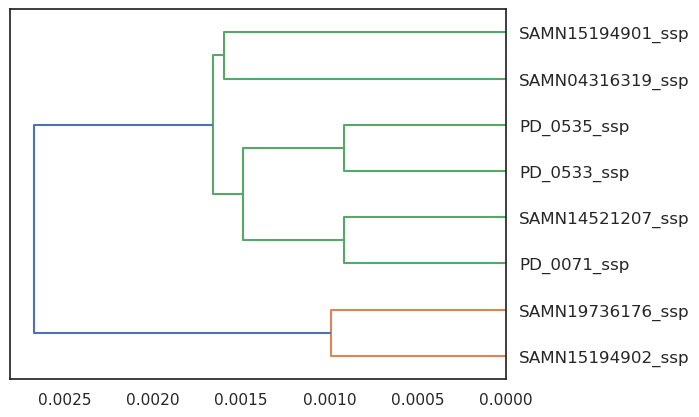

In [63]:
plot_dendrogram(model, col_names=input_df.columns, truncate_mode="level", p=8)

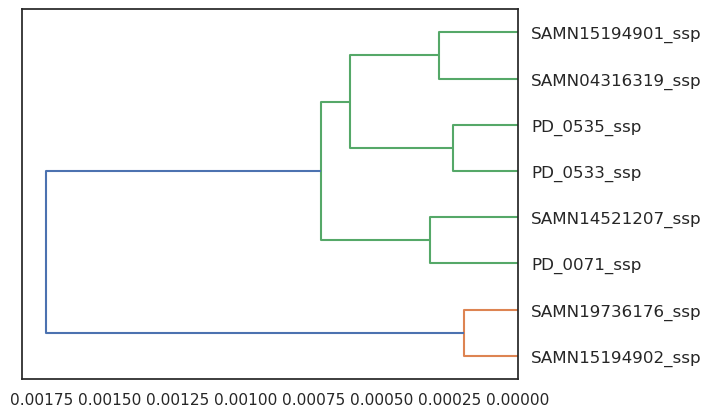

In [56]:
plot_dendrogram(model, col_names=input_df.columns, truncate_mode="level", p=8)

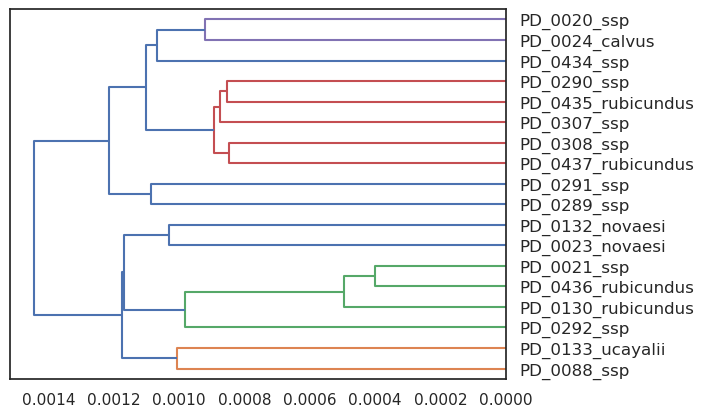

In [77]:
plot_dendrogram(model, col_names=input_df.columns, truncate_mode="level", p=8)

In [80]:
fst_calc = sg.Fst(sg.window_by_genome(ds_filt))
fst_matrix = fst_calc.stat_Fst.values
fst_matrix

array([[[        nan,  0.35735155,  0.38925449,  0.53493312,
          0.23947928,  0.54623094,  0.19630261,  0.03089528,
          0.58119338,  0.37345459,  0.20103722,  0.22916155,
          0.24817758,  0.44645794,  0.22521202,  0.22902709,
          0.22892265,  0.38434232],
        [ 0.35735155,         nan,  0.03519309,  0.33080404,
          0.33724889,  0.34588379,  0.30435848,  0.30436969,
          0.39192782,  0.11590388,  0.25156208,  0.33183033,
          0.28810667,  0.21091781,  0.32333535,  0.33445798,
          0.34741693,  0.12909928],
        [ 0.38925449,  0.03519309,         nan,  0.36404461,
          0.36761843,  0.38227883,  0.33754036,  0.33540502,
          0.42824425,  0.1580109 ,  0.28282053,  0.36512766,
          0.32203484,  0.24799209,  0.35317013,  0.36585424,
          0.38083775,  0.17082135],
        [ 0.53493312,  0.33080404,  0.36404461,         nan,
          0.50953247, -0.0226993 ,  0.47877083,  0.48079861,
          0.06303844,  0.32724383,  0.

In [89]:
input_df_fst = pd.DataFrame(np.nan_to_num(fst_matrix[0].clip(0)), columns = ID_subspecies)
input_df_fst

,PD_0024_calvus,PD_0023_novaesi,PD_0132_novaesi,PD_0130_rubicundus,PD_0435_rubicundus,PD_0436_rubicundus,PD_0437_rubicundus,PD_0020_ssp,PD_0021_ssp,PD_0088_ssp,PD_0289_ssp,PD_0290_ssp,PD_0291_ssp,PD_0292_ssp,PD_0307_ssp,PD_0308_ssp,PD_0434_ssp,PD_0133_ucayalii
0,0.000000,0.357352,0.389254,0.534933,0.239479,0.546231,0.196303,0.030895,0.581193,0.373455,0.201037,0.229162,0.248178,0.446458,0.225212,0.229027,0.228923,0.384342
1,0.357352,0.000000,0.035193,0.330804,0.337249,0.345884,0.304358,0.304370,0.391928,0.115904,0.251562,0.331830,0.288107,0.210918,0.323335,0.334458,0.347417,0.129099
2,0.389254,0.035193,0.000000,0.364045,0.367618,0.382279,0.337540,0.335405,0.428244,0.158011,0.282821,0.365128,0.322035,0.247992,0.353170,0.365854,0.380838,0.170821
3,0.534933,0.330804,0.364045,0.000000,0.509532,0.000000,0.478771,0.480799,0.063038,0.327244,0.433635,0.506336,0.470595,0.317556,0.496181,0.506149,0.521674,0.341822
4,0.239479,0.337249,0.367618,0.509532,0.000000,0.521183,0.000000,0.165107,0.556304,0.351840,0.186196,0.000000,0.236708,0.421258,0.000000,0.021112,0.230249,0.364306
5,0.546231,0.345884,0.382279,0.000000,0.521183,0.000000,0.489306,0.492033,0.000000,0.344899,0.444277,0.518779,0.482307,0.342436,0.507436,0.517863,0.532400,0.359713
6,0.196303,0.304358,0.337540,0.478771,0.000000,0.489306,0.000000,0.123725,0.525131,0.321146,0.141267,0.000000,0.192813,0.389637,0.000000,0.000000,0.191014,0.332746
7,0.030895,0.304370,0.335405,0.480799,0.165107,0.492033,0.123725,0.000000,0.526802,0.321672,0.136079,0.156087,0.183513,0.394588,0.147218,0.160878,0.151137,0.333095
8,0.581193,0.391928,0.428244,0.063038,0.556304,0.000000,0.525131,0.526802,0.000000,0.389239,0.478540,0.554415,0.516460,0.396011,0.543850,0.553701,0.567177,0.403764
9,0.373455,0.115904,0.158011,0.327244,0.351840,0.344899,0.321146,0.321672,0.389239,0.000000,0.271250,0.347877,0.308641,0.211637,0.336250,0.349005,0.362308,0.000000


In [90]:
model = AgglomerativeClustering(distance_threshold=0.1, n_clusters=None, metric="precomputed", linkage="average")
model = model.fit(input_df_fst)
labels = model.labels_
labels

array([2, 0, 0, 1, 6, 1, 6, 2, 1, 3, 5, 6, 5, 7, 6, 6, 4, 3])

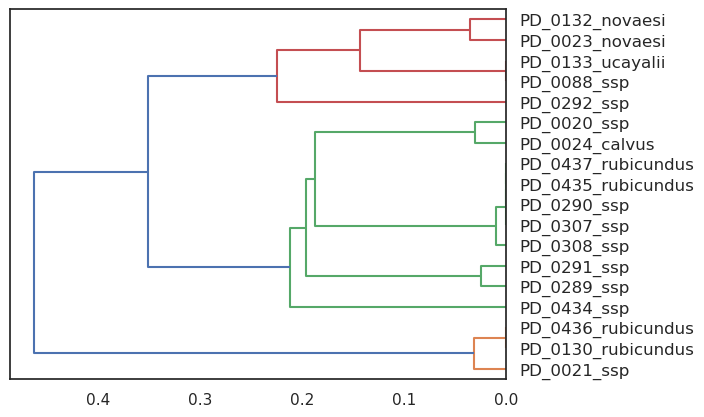

In [91]:
plot_dendrogram(model, col_names=input_df_fst.columns, truncate_mode="level", p=8)

In [74]:
print("Loading metadata")
zarr_path = "../zarr_20x_inds/Pan_troglodytes_ssp/zarr"
metadata_path = "/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/"

short_form = zarr_path.split("/")[-2].split("_")[0]
long_form = zarr_path.split("/")[-2]
# Loading the various metadata files. Metadata, contig information, callability bed.
metadata_df = pd.read_csv(metadata_path+"{}_individuals.txt".format(short_form), sep="\t")
metadata_df["SEX_I"] = [0 if x == "F" else 1 for x in metadata_df.GENETIC_SEX]
regions_df = pd.read_csv(metadata_path+"{}_regions_and_batches.txt".format(short_form), sep="\t")
regions_df["LENGTH"] = regions_df["END"]-regions_df["START"]
regions_df["chr_type"] = ["chrX" if x == 2 and y == 1 else "aut" for x, y in zip(regions_df.FEMALE_PLOIDY, regions_df.MALE_PLOIDY)]
large_contigs = regions_df.loc[(regions_df.LENGTH >= 1000000) & (regions_df.FEMALE_PLOIDY == 2)].CONTIG_ID.unique()
large_aut = regions_df.loc[(regions_df.LENGTH >= 1000000) & (regions_df.FEMALE_PLOIDY == 2) &
                        (regions_df.MALE_PLOIDY == 2)].CONTIG_ID
large_x = regions_df.loc[(regions_df.LENGTH >= 1000000) & (regions_df.FEMALE_PLOIDY == 2) &
                        (regions_df.MALE_PLOIDY == 1)].CONTIG_ID
print("Loading bed files")
bed_files = read_beds(long_form)
# Loading the genetic data.
print("Loading genetic data")
df_l = []
ds_full = sg.load_dataset(zarr_path)
kept_contigs =  [x for x in ds_full.contig_id.values if (x == large_contigs).any()]
contig_IDs = pd.Series(kept_contigs).map(dict(zip(ds_full.contig_id.values, range(len(ds_full.contig_id.values))))).values

Loading metadata
Loading bed files
Loading genetic data


In [101]:
regions_df.loc[(regions_df.LENGTH >= 1000000) & (regions_df.FEMALE_PLOIDY == 2) &
                        (regions_df.MALE_PLOIDY == 2)]

,REFERENCE_FOLDER,REGION,CONTIG_ID,START,END,BATCH,FEMALE_PLOIDY,MALE_PLOIDY,LENGTH,chr_type
0,Pan_paniscus_ssp,NC_073249.2,NC_073249.2,0,227705052,0,2,2,227705052,aut
1,Pan_paniscus_ssp,NC_085926.1,NC_085926.1,0,196431891,1,2,2,196431891,aut
2,Pan_paniscus_ssp,NC_073252.2,NC_073252.2,0,188614375,2,2,2,188614375,aut
3,Pan_paniscus_ssp,NC_073253.2,NC_073253.2,0,176551333,3,2,2,176551333,aut
4,Pan_paniscus_ssp,NC_073254.2,NC_073254.2,0,191151712,4,2,2,191151712,aut
5,Pan_paniscus_ssp,NC_073255.2,NC_073255.2,0,196309857,5,2,2,196309857,aut
6,Pan_paniscus_ssp,NC_073256.2,NC_073256.2,0,162793952,6,2,2,162793952,aut
7,Pan_paniscus_ssp,NC_073257.2,NC_073257.2,0,147028407,7,2,2,147028407,aut
8,Pan_paniscus_ssp,NC_073258.2,NC_073258.2,0,135750398,8,2,2,135750398,aut
9,Pan_paniscus_ssp,NC_073259.2,NC_073259.2,0,141815175,9,2,2,141815175,aut


In [93]:
large_aut

0     NC_073249.2
1     NC_085926.1
2     NC_073252.2
3     NC_073253.2
4     NC_073254.2
5     NC_073255.2
6     NC_073256.2
7     NC_073257.2
8     NC_073258.2
9     NC_073259.2
10    NC_073260.2
11    NC_073261.2
12    NC_073262.2
13    NC_073263.2
14    NC_073264.2
15    NC_073265.2
16    NC_073266.2
17    NC_073267.2
18    NC_073268.2
19    NC_073269.2
20    NC_073270.2
21    NC_073271.2
22    NC_085927.1
24    NC_073272.2
35    NC_072398.2
36    NC_086015.1
37    NC_072401.2
38    NC_072402.2
39    NC_072403.2
40    NC_072404.2
41    NC_072405.2
42    NC_072406.2
43    NC_072407.2
44    NC_072408.2
45    NC_072409.2
46    NC_072410.2
47    NC_072411.2
48    NC_072412.2
49    NC_072413.2
50    NC_072414.2
51    NC_072415.2
52    NC_072416.2
53    NC_072417.2
54    NC_072418.2
55    NC_072419.2
56    NC_072420.2
57    NC_086016.1
59    NC_072421.2
Name: CONTIG_ID, dtype: object

In [103]:
large_aut[47:48]

59    NC_072421.2
Name: CONTIG_ID, dtype: object

In [104]:
large_aut_sel = large_aut[47:48]
kept_contigs =  [x for x in ds_full.contig_id.values if (x == large_aut_sel).any()]
missing_filter = 0.0
missing_rate = ds_full.call_genotype_mask[:,:,0].sum(axis=1).values/ds_full.call_genotype_mask[:,:,0].count(axis=1).values
ds_filt = ds_full.isel(variants=(missing_rate <= missing_filter))
contig_IDs = pd.Series(kept_contigs).map(dict(zip(ds_filt.contig_id.values, range(len(ds_filt.contig_id.values))))).values
ds_filt = ds_filt.sel(variants=(ds_filt.variant_contig.isin(contig_IDs).compute()), contigs=contig_IDs)
ds_filt["sample_cohort"] = ds_filt["samples"]

In [105]:
div_calc = sg.divergence(sg.window_by_genome(ds_filt))
value_matrix = div_calc.stat_divergence.values
value_matrix

array([[[    nan, 34660.5, 40358.5, ..., 49437. , 49088.5, 49389.5],
        [34660.5,     nan, 40462. , ..., 49583. , 49232. , 49690. ],
        [40358.5, 40462. , 39503. , ..., 51885. , 51464. , 52069.5],
        ...,
        [49437. , 49583. , 51885. , ..., 18827. , 20777. , 21071.5],
        [49088.5, 49232. , 51464. , ..., 20777. , 21632. , 21283.5],
        [49389.5, 49690. , 52069.5, ..., 21071.5, 21283.5,     nan]]])

In [106]:
bed_select = bed_files.loc[bed_files.chrom.isin(large_aut_sel)]
total_cover = bed_select.end.sum()-bed_select.start.sum()
total_cover

143837412

In [108]:
ID_subspecies = sub_vasili.loc[sub_vasili.species == "troglodytes"].ID+"_"+sub_vasili.loc[sub_vasili.species == "troglodytes"].subspecies
input_df = pd.DataFrame(value_matrix[0]/total_cover, columns = ID_subspecies)
input_df

,SAMN01920517_ellioti,SAMN01920520_ellioti,SAMN01920521_ellioti,SAMN01920523_ellioti,SAMN01920525_ellioti,SAMEA4374788_schweinfurthii,SAMEA4374789_schweinfurthii,SAMEA4374790_schweinfurthii,SAMEA4374791_schweinfurthii,SAMEA4374792_schweinfurthii,...,SAMEA4374763_verus,SAMEA4374766_verus,SAMEA4374767_verus,SAMEA4374768_verus,SAMEA4374769_verus,SAMEA5204227_verus,SAMEA5204228_verus,SAMEA5204229_verus,SAMN01920538_verus,SAMN01920540_verus
0,NaN,0.000241,0.000281,0.000242,0.000250,0.000407,0.000404,0.000405,0.000409,0.000411,...,0.000346,0.000345,0.000344,0.000345,0.000346,0.000345,0.000344,0.000344,0.000341,0.000343
1,0.000241,NaN,0.000281,0.000246,0.000239,0.000410,0.000409,0.000408,0.000412,0.000415,...,0.000346,0.000345,0.000345,0.000345,0.000345,0.000346,0.000345,0.000345,0.000342,0.000345
2,0.000281,0.000281,0.000275,0.000280,0.000277,0.000402,0.000402,0.000402,0.000403,0.000408,...,0.000362,0.000361,0.000361,0.000361,0.000362,0.000362,0.000361,0.000361,0.000358,0.000362
3,0.000242,0.000246,0.000280,NaN,0.000254,0.000409,0.000408,0.000407,0.000412,0.000413,...,0.000348,0.000346,0.000346,0.000346,0.000348,0.000347,0.000346,0.000346,0.000342,0.000345
4,0.000250,0.000239,0.000277,0.000254,0.000243,0.000410,0.000410,0.000409,0.000411,0.000416,...,0.000348,0.000347,0.000345,0.000346,0.000346,0.000348,0.000346,0.000347,0.000343,0.000346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,0.000345,0.000346,0.000362,0.000347,0.000348,0.000422,0.000424,0.000422,0.000425,0.000430,...,0.000150,0.000141,0.000152,0.000152,0.000154,NaN,0.000145,0.000148,0.000147,0.000153
90,0.000344,0.000345,0.000361,0.000346,0.000346,0.000423,0.000423,0.000423,0.000425,0.000430,...,0.000147,0.000149,0.000148,0.000147,0.000151,0.000145,0.000138,0.000111,0.000143,0.000145
91,0.000344,0.000345,0.000361,0.000346,0.000347,0.000423,0.000423,0.000424,0.000426,0.000430,...,0.000148,0.000151,0.000150,0.000149,0.000152,0.000148,0.000111,0.000131,0.000144,0.000146
92,0.000341,0.000342,0.000358,0.000342,0.000343,0.000419,0.000420,0.000419,0.000421,0.000425,...,0.000145,0.000147,0.000147,0.000146,0.000148,0.000147,0.000143,0.000144,0.000150,0.000148


In [125]:
model = AgglomerativeClustering(distance_threshold=0.0003, n_clusters=None, metric="precomputed", linkage="average")
model = model.fit(np.nan_to_num(input_df))
labels = model.labels_
labels

array([ 5,  5,  5,  5,  5,  2, 30, 23, 24,  0, 22, 31, 29, 20,  0, 27, 12,
       12, 28,  0,  2,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1, 15, 17,
       19,  0, 18,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 21,  1,
        1,  1,  1,  1,  1,  1, 10,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, 16,  7,  8, 14,  9,  3,  4, 25, 13, 11,  6, 26,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1])

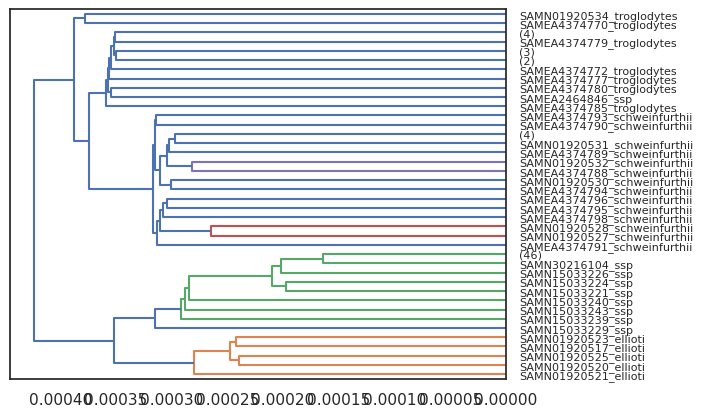

In [128]:
plot_dendrogram(model, col_names=input_df.columns, truncate_mode="level", p=8)

In [117]:
fst_calc = sg.Fst(sg.window_by_genome(ds_filt))
fst_matrix = fst_calc.stat_Fst.values
fst_matrix

array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ..., 0.43789149,
         0.40604112,        nan],
        ...,
        [       nan,        nan, 0.43789149, ...,        nan,
         0.02635125,        nan],
        [       nan,        nan, 0.40604112, ..., 0.02635125,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]])

In [121]:
fst_matrix

array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ..., 0.43789149,
         0.40604112,        nan],
        ...,
        [       nan,        nan, 0.43789149, ...,        nan,
         0.02635125,        nan],
        [       nan,        nan, 0.40604112, ..., 0.02635125,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]])

In [135]:
# Fst filtering
maf_filter = 0.1
missing_filter = 0.0
missing_rate = ds_full.call_genotype_mask[:,:,0].sum(axis=1).values/ds_full.call_genotype_mask[:,:,0].count(axis=1).values
ds_filt = ds_full.isel(variants=(missing_rate <= missing_filter))
allele_counts = sg.count_variant_alleles(ds_filt)["variant_allele_count"]
ds_filt = ds_filt.isel(variants=((maf_filter <= (allele_counts[:,1]/allele_counts.sum(axis=1))) &
                                     (1-maf_filter >= (allele_counts[:,1]/allele_counts.sum(axis=1)))).compute())
# Restricting dataset to autosomal contigs.
kept_contigs =  [x for x in ds_filt.contig_id.values if (x == large_aut).any()]
contig_IDs = pd.Series(kept_contigs).map(dict(zip(ds_filt.contig_id.values, range(len(ds_filt.contig_id.values))))).values
ds_filt = ds_filt.sel(variants=(ds_filt.variant_contig.isin(contig_IDs).compute()), contigs=contig_IDs)
# Pick out 100000 variants and perform Fst.
ds_filt = ds_filt.isel(variants=(0 == ds_filt.variants%((len(ds_filt.variants)//(100000)))))
ds_filt

<xarray.Dataset> Size: 52MB
Dimensions:               (variants: 100649, samples: 94, ploidy: 2,
                           contigs: 24, filters: 2, region_index_values: 629,
                           region_index_fields: 6, alt_alleles: 1, alleles: 2)
Dimensions without coordinates: variants, samples, ploidy, contigs, filters,
                                region_index_values, region_index_fields,
                                alt_alleles, alleles
Data variables: (12/19)
    call_genotype         (variants, samples, ploidy) int8 19MB dask.array<chunksize=(100649, 94, 2), meta=np.ndarray>
    call_genotype_mask    (variants, samples, ploidy) bool 19MB dask.array<chunksize=(100649, 94, 2), meta=np.ndarray>
    call_genotype_phased  (variants, samples) bool 9MB dask.array<chunksize=(100649, 94), meta=np.ndarray>
    contig_id             (contigs) object 192B dask.array<chunksize=(24,), meta=np.ndarray>
    contig_length         (contigs) float64 192B dask.array<chunksize=(24,), meta=np.ndarray>
    filter_description    (filters) object 16B dask.array<chunksize=(2,), meta=np.ndarray>
    ...                    ...
    variant_filter        (variants, filters) bool 201kB dask.array<chunksize=(100649, 2), meta=np.ndarray>
    variant_id            (variants) object 805kB dask.array<chunksize=(100649,), meta=np.ndarray>
    variant_id_mask       (variants) bool 101kB dask.array<chunksize=(100649,), meta=np.ndarray>
    variant_length        (variants) int16 201kB dask.array<chunksize=(100649,), meta=np.ndarray>
    variant_position      (variants) int32 403kB dask.array<chunksize=(100649,), meta=np.ndarray>
    variant_quality       (variants) float32 403kB dask.array<chunksize=(100649,), meta=np.ndarray>
Attributes:
    source:                bio2zarr-0.1.6
    vcf_meta_information:  [['fileformat', 'VCFv4.2'], ['ALT', '<ID=NON_REF,D...
    vcf_zarr_version:      0.4

In [162]:
ds_filt

<xarray.Dataset> Size: 52MB
Dimensions:               (variants: 100649, samples: 94, ploidy: 2,
                           contigs: 24, filters: 2, region_index_values: 629,
                           region_index_fields: 6, alt_alleles: 1, alleles: 2)
Dimensions without coordinates: variants, samples, ploidy, contigs, filters,
                                region_index_values, region_index_fields,
                                alt_alleles, alleles
Data variables: (12/19)
    call_genotype         (variants, samples, ploidy) int8 19MB dask.array<chunksize=(100649, 94, 2), meta=np.ndarray>
    call_genotype_mask    (variants, samples, ploidy) bool 19MB dask.array<chunksize=(100649, 94, 2), meta=np.ndarray>
    call_genotype_phased  (variants, samples) bool 9MB dask.array<chunksize=(100649, 94), meta=np.ndarray>
    contig_id             (contigs) object 192B dask.array<chunksize=(24,), meta=np.ndarray>
    contig_length         (contigs) float64 192B dask.array<chunksize=(24,), meta=np.ndarray>
    filter_description    (filters) object 16B dask.array<chunksize=(2,), meta=np.ndarray>
    ...                    ...
    variant_filter        (variants, filters) bool 201kB dask.array<chunksize=(100649, 2), meta=np.ndarray>
    variant_id            (variants) object 805kB dask.array<chunksize=(100649,), meta=np.ndarray>
    variant_id_mask       (variants) bool 101kB dask.array<chunksize=(100649,), meta=np.ndarray>
    variant_length        (variants) int16 201kB dask.array<chunksize=(100649,), meta=np.ndarray>
    variant_position      (variants) int32 403kB dask.array<chunksize=(100649,), meta=np.ndarray>
    variant_quality       (variants) float32 403kB dask.array<chunksize=(100649,), meta=np.ndarray>
Attributes:
    source:                bio2zarr-0.1.6
    vcf_meta_information:  [['fileformat', 'VCFv4.2'], ['ALT', '<ID=NON_REF,D...
    vcf_zarr_version:      0.4

In [170]:
# Greedy clustering.
c_l = [0, 1, 2, 0, 1, 3, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 6, 6, 4, 4, 7, 8, 8, 4, 9, 8, 8, 8, 8, 8, 8, 8, 10, 10, 11,
       4, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 12, 8, 12, 8, 8, 8, 8, 8, 8, 8, 10, 8, 12, 12, 8, 8, 12, 8, 8, 8, 8,
       8, 8, 13, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 14, 8, 8, 15, 8, 8, 8, 8, 8, 8, 8, 8]

c_l = [0]

for s in range(len(c_l)+1, len(ds_filt.samples)+1):
    ds_s = ds_filt.isel(samples=ds_filt.samples[:s])
    missing_rate = ds_s.call_genotype_mask[:,:,1].sum(axis=1).values/ds_s.call_genotype_mask[:,:,1].count(axis=1).values
    ds_s = ds_s.isel(variants=(missing_rate <= 0))
    c_l_propose = c_l.copy()
    c_l_propose.append(max(c_l)+1)
    ds_s["sample_cohort"] = (("samples"), c_l_propose)
    ds_s = sg.window_by_genome(ds_s)
    fst_calc = sg.Fst(ds_s)
    # Take the last row and determine if any clusters are close enough (0.05 Fst).
    # Otherwise set it as a new cluster.
    best_fit = 1
    c = 0
    fst_vals = np.nan_to_num(fst_calc.stat_Fst.values, nan=0.05)
    print(fst_vals)
    vals = fst_vals[0][-1]
    for i in range(len(vals)):
        if vals[i] < best_fit:
            best_fit = vals[i]
            c = i
    print(best_fit, len(ds_s.variants))
    if best_fit <= 0.05:
        c_l.append(c)
    else:
        c_l.append(max(c_l)+1)
    print(c_l)

[[[5.00000000e-02 3.36648575e-02 9.80713718e-02 4.38866628e-01
   3.47320022e-01 4.17970320e-01 3.92648680e-01 3.92939238e-01
   4.90157495e-01 5.87035940e-01 3.09213630e-01 3.59234216e-01
   3.54605756e-01 3.66346572e-01 3.31817517e-01 5.46612246e-01
   4.93946545e-01]
  [3.36648575e-02 5.00000000e-02 8.15219318e-02 4.27093491e-01
   3.35876306e-01 4.07781273e-01 3.80519421e-01 3.81376617e-01
   4.82514246e-01 5.79227914e-01 2.96248366e-01 3.46095134e-01
   3.46253748e-01 3.54244214e-01 3.19992364e-01 5.38875165e-01
   4.86744030e-01]
  [9.80713718e-02 8.15219318e-02 5.00000000e-02 3.79321132e-01
   2.83843044e-01 3.58689074e-01 3.28860547e-01 3.29943574e-01
   4.74567066e-01 5.67801379e-01 2.33886485e-01 2.86737320e-01
   3.35146271e-01 2.95503616e-01 2.60175318e-01 5.29335345e-01
   4.79277822e-01]
  [4.38866628e-01 4.27093491e-01 3.79321132e-01 5.00000000e-02
   1.13082604e-01 1.92683467e-01 1.77089164e-01 6.24447717e-02
   5.90434735e-01 6.65018346e-01 2.21752755e-01 2.76426650e-0

In [171]:
ds_filt["sample_cohort"] = (("samples"), c_l)

In [173]:
fst_matrix = fst_calc.stat_Fst.values
fst_matrix

array([[[           nan, 3.36648575e-02, 9.80713718e-02, 4.38866628e-01,
         3.47320022e-01, 4.17970320e-01, 3.92648680e-01, 3.92939238e-01,
         4.90157495e-01, 5.87035940e-01, 3.09213630e-01, 3.59234216e-01,
         3.54605756e-01, 3.66346572e-01, 3.31817517e-01, 5.46612246e-01,
         4.93946545e-01],
        [3.36648575e-02,            nan, 8.15219318e-02, 4.27093491e-01,
         3.35876306e-01, 4.07781273e-01, 3.80519421e-01, 3.81376617e-01,
         4.82514246e-01, 5.79227914e-01, 2.96248366e-01, 3.46095134e-01,
         3.46253748e-01, 3.54244214e-01, 3.19992364e-01, 5.38875165e-01,
         4.86744030e-01],
        [9.80713718e-02, 8.15219318e-02,            nan, 3.79321132e-01,
         2.83843044e-01, 3.58689074e-01, 3.28860547e-01, 3.29943574e-01,
         4.74567066e-01, 5.67801379e-01, 2.33886485e-01, 2.86737320e-01,
         3.35146271e-01, 2.95503616e-01, 2.60175318e-01, 5.29335345e-01,
         4.79277822e-01],
        [4.38866628e-01, 4.27093491e-01, 3.793

In [177]:
input_df_fst = pd.DataFrame(np.nan_to_num(fst_matrix[0].clip(0)))
input_df_fst

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.000000,0.033665,0.098071,0.438867,0.347320,0.417970,0.392649,0.392939,0.490157,0.587036,0.309214,0.359234,0.354606,0.366347,0.331818,0.546612,0.493947
1,0.033665,0.000000,0.081522,0.427093,0.335876,0.407781,0.380519,0.381377,0.482514,0.579228,0.296248,0.346095,0.346254,0.354244,0.319992,0.538875,0.486744
2,0.098071,0.081522,0.000000,0.379321,0.283843,0.358689,0.328861,0.329944,0.474567,0.567801,0.233886,0.286737,0.335146,0.295504,0.260175,0.529335,0.479278
3,0.438867,0.427093,0.379321,0.000000,0.113083,0.192683,0.177089,0.062445,0.590435,0.665018,0.221753,0.276427,0.461684,0.289465,0.260336,0.634632,0.594345
4,0.347320,0.335876,0.283843,0.113083,0.000000,0.070515,0.071287,0.051658,0.526587,0.601606,0.112841,0.167861,0.391015,0.180959,0.149836,0.570920,0.530386
5,0.417970,0.407781,0.358689,0.192683,0.070515,0.000000,0.159212,0.129942,0.574970,0.649104,0.196146,0.251443,0.445335,0.266068,0.234986,0.619086,0.578818
6,0.392649,0.380519,0.328861,0.177089,0.071287,0.159212,0.000000,0.113271,0.558784,0.633738,0.166430,0.222391,0.426078,0.234756,0.202433,0.603149,0.562214
7,0.392939,0.381377,0.329944,0.062445,0.051658,0.129942,0.113271,0.000000,0.557444,0.632198,0.165144,0.218466,0.425206,0.234913,0.201535,0.601933,0.561360
8,0.490157,0.482514,0.474567,0.590435,0.526587,0.574970,0.558784,0.557444,0.000000,0.176165,0.500045,0.532585,0.045881,0.537033,0.513538,0.109271,0.000053
9,0.587036,0.579228,0.567801,0.665018,0.601606,0.649104,0.633738,0.632198,0.176165,0.000000,0.579862,0.612834,0.180756,0.618340,0.594740,0.288999,0.182447


In [178]:
model = AgglomerativeClustering(distance_threshold=0.1, n_clusters=None, metric="precomputed", linkage="average")
model = model.fit(input_df_fst)
labels = model.labels_
labels

array([2, 2, 2, 1, 1, 5, 6, 1, 3, 4, 0, 0, 3, 0, 0, 7, 3])

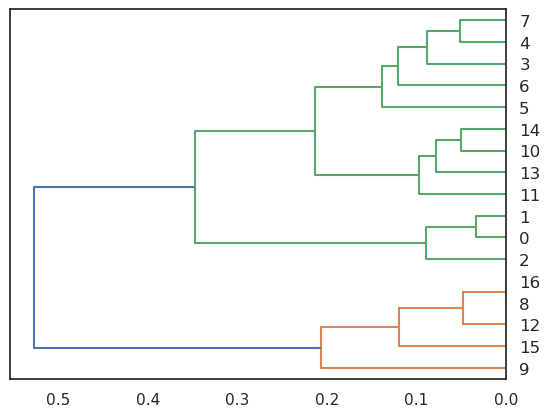

In [180]:
plot_dendrogram(model, col_names=input_df_fst.columns, truncate_mode="level", p=8)

In [ ]:
c_l = [0]

for s in range(len(c_l)+1, len(ds_filt.samples)+1):
    ds_s = ds_filt.isel(samples=ds_filt.samples[:s])
    missing_rate = ds_s.call_genotype_mask[:,:,1].sum(axis=1).values/ds_s.call_genotype_mask[:,:,1].count(axis=1).values
    ds_s = ds_s.isel(variants=(missing_rate <= 0))
    c_l_propose = c_l.copy()
    c_l_propose.append(max(c_l)+1)
    ds_s["sample_cohort"] = (("samples"), c_l_propose)
    ds_s = sg.window_by_genome(ds_s)
    fst_calc = sg.divergence(ds_s)
    # Take the last row and determine if any clusters are close enough (0.05 Fst).
    # Otherwise set it as a new cluster.
    best_fit = 1
    c = 0
    fst_vals = np.nan_to_num(fst_calc.stat_Fst.values, nan=0.05)
    print(fst_vals)
    vals = fst_vals[0][-1]
    for i in range(len(vals)):
        if vals[i] < best_fit:
            best_fit = vals[i]
            c = i
    print(best_fit, len(ds_s.variants))
    if best_fit <= 0.05:
        c_l.append(c)
    else:
        c_l.append(max(c_l)+1)
    print(c_l)